In [1]:
pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.9.2


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("synthetic_AI_Resume_Screening_data_Processed_Full.csv")

In [4]:
data.head()

,Experience (Years),Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Edu_B.Sc,Edu_B.Tech,Edu_Diploma,Edu_M.Sc,Edu_M.Tech,...,Cert_developer,Cert_google,Cert_learning,Cert_ml,Cert_nan,Cert_oracle,Cert_pmp,Cert_redhat,Cert_specialization,Cert_tensorflow
0,7,1,60109,0,99,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,6,1,93055,17,97,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.822371,0.0,0.000000,0.0,0.0
2,13,1,208161,11,83,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.825691,0.0,0.0
3,15,1,173163,16,91,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.822371,0.0,0.000000,0.0,0.0
4,8,1,193524,9,73,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0


In [5]:
data.drop(['Cert_ai',
 'Cert_azure',
 'Cert_ccna',
 'Cert_cisco',
 'Cert_developer',
 'Cert_oracle',
 'Cert_pmp',
 'Cert_redhat',
 'Cert_tensorflow',
 'Edu_Diploma',
 'Edu_M.Sc',
 'Job_Blockchain Developer',
 'Job_Business Analyst',
 'Job_Cloud Engineer',
 'Job_DevOps Engineer',
 'Job_ML Engineer',
 'Job_Mobile App Developer',
 'Skill_analysis',
 'Skill_android',
 'Skill_aws',
 'Skill_big',
 'Skill_blockchain',
 'Skill_boot',
 'Skill_cloud',
 'Skill_computer',
 'Skill_contracts',
 'Skill_data',
 'Skill_development',
 'Skill_docker',
 'Skill_embedded',
 'Skill_ethereum',
 'Skill_excel',
 'Skill_hadoop',
 'Skill_huggingface',
 'Skill_ios',
 'Skill_javascript',
 'Skill_js',
 'Skill_kotlin',
 'Skill_kubernetes',
 'Skill_language',
 'Skill_management',
 'Skill_microservices',
 'Skill_natural',
 'Skill_node',
 'Skill_opencv',
 'Skill_powerbi',
 'Skill_processing',
 'Skill_risk',
 'Skill_security',
 'Skill_smart',
 'Skill_spark',
 'Skill_spring',
 'Skill_swift',
 'Skill_systems',
 'Skill_vision'],axis=1,inplace=True)

In [6]:
data.shape

(1000, 35)

In [7]:
X_test=np.array(data.drop("Recruiter Decision",axis=1))

In [8]:
X_test.shape

(1000, 34)

In [9]:
data.columns

Index(['Experience (Years)', 'Recruiter Decision', 'Salary Expectation ($)',
       'Projects Count', 'AI Score (0-100)', 'Edu_B.Sc', 'Edu_B.Tech',
       'Edu_M.Tech', 'Edu_MBA', 'Edu_PhD', 'Job_AI Researcher',
       'Job_Cybersecurity Analyst', 'Job_Data Scientist',
       'Job_Software Engineer', 'Skill_cybersecurity', 'Skill_deep',
       'Skill_java', 'Skill_learning', 'Skill_linux', 'Skill_machine',
       'Skill_networking', 'Skill_nlp', 'Skill_python', 'Skill_pytorch',
       'Skill_react', 'Skill_sql', 'Skill_tensorflow', 'Cert_aws',
       'Cert_certified', 'Cert_deep', 'Cert_google', 'Cert_learning',
       'Cert_ml', 'Cert_nan', 'Cert_specialization'],
      dtype='object')

In [10]:
y_test=data.iloc[:,1].values

In [11]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input=nn.Linear(34,64)
        self.l1=nn.Linear(64,128)
        self.l2=nn.Linear(128,256)
        self.l3=nn.Linear(256,256)
        self.l4=nn.Linear(256,128)
        self.l5=nn.Linear(128,64)
        self.l6=nn.Linear(64,32)
        self.l7=nn.Linear(32,16)
        self.output=nn.Linear(16,2)

    def forward(self,x):
        x=F.relu(self.input(x))
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.relu(self.l4(x))
        x=F.relu(self.l5(x))
        x=F.relu(self.l6(x))
        x=F.relu(self.l7(x))
        return self.output(x)

# load state_dict
model = MyModel()   # create model instance
model.load_state_dict(torch.load("ann_model.pth"))
model.eval()

MyModel(
  (input): Linear(in_features=34, out_features=64, bias=True)
  (l1): Linear(in_features=64, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (l4): Linear(in_features=256, out_features=128, bias=True)
  (l5): Linear(in_features=128, out_features=64, bias=True)
  (l6): Linear(in_features=64, out_features=32, bias=True)
  (l7): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
)

In [13]:

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


In [14]:
X_test_tensor[:1]

tensor([[7.0000e+00, 6.0109e+04, 0.0000e+00, 9.9000e+01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 8.3425e-01, 5.5139e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [15]:
pred_ = []

with torch.no_grad():
    for x in X_test_tensor:
        y_pred = model(x.unsqueeze(0))       # add batch dimension
        pred_.append(torch.argmax(y_pred, dim=1).item())

In [16]:
pred_[:5]

[1, 1, 1, 1, 1]

In [17]:
acc=np.mean((pred_==y_test)*100)

In [18]:
acc

93.8

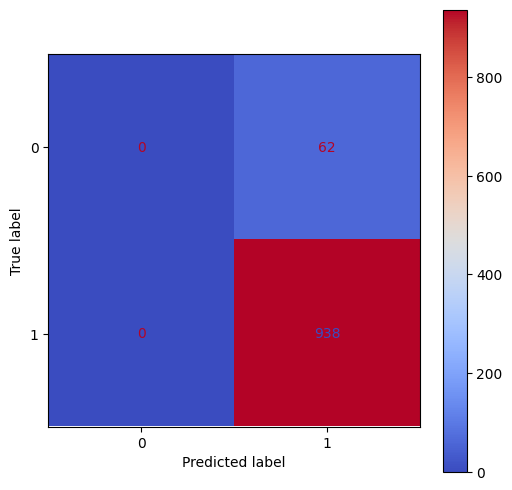

In [23]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay,accuracy_score
cmx=confusion_matrix(y_test,pred_)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(cmap='coolwarm',xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

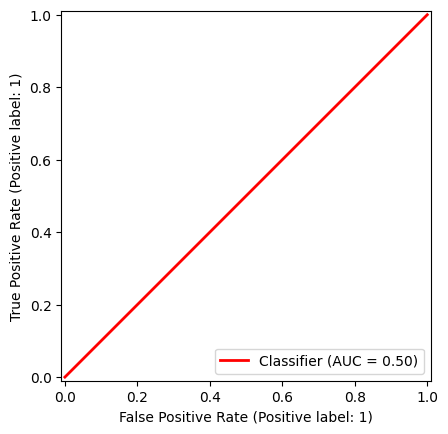

In [25]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,pred_,drop_intermediate=False,lw=2,color='r')
plt.show()

In [27]:
print(f"f1_score:{f1_score(y_test,pred_)}")
print(f"precision score:{precision_score(y_test,pred_)}")
print(f"recall score:{recall_score(y_test,pred_)}")
print(f"accuracy:{accuracy_score(y_test,pred_)}")

f1_score:0.9680082559339526
precision score:0.938
recall score:1.0
accuracy:0.938


In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_test_scaled=ss.fit_transform(X_test)

In [31]:
#testa accuracy for logistic regression
import joblib
model_log = joblib.load("logreg_model.pkl")    
y_pred_log = model_log.predict(X_test_scaled)



In [33]:
acc_log=np.mean((y_pred_log==y_test)*100)

In [35]:
acc_log

91.5

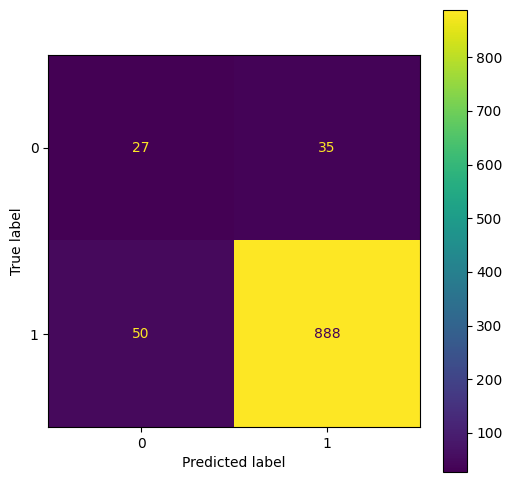

In [37]:
cmx=confusion_matrix(y_test,y_pred_log)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

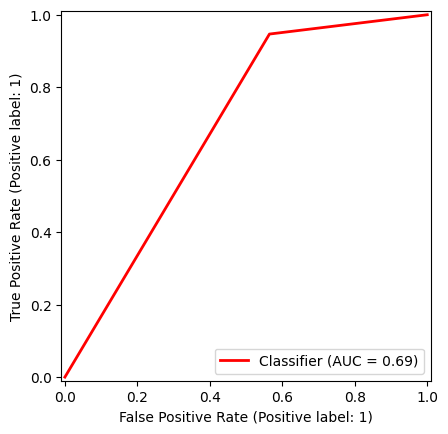

In [39]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_log,drop_intermediate=False,lw=2,color='r')
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
print(f"f1_score:{f1_score(y_test,y_pred_log)}")
print(f"precision score:{precision_score(y_test,y_pred_log)}")
print(f"recall score:{recall_score(y_test,y_pred_log)}")
print(f"accuracy:{accuracy_score(y_test,y_pred_log)}")

f1_score:0.9543256313809779
precision score:0.962080173347779
recall score:0.9466950959488273
accuracy:0.915


In [43]:
#test accuracy for 
import joblib
model_svm = joblib.load("svm_model.pkl") 
y_pred_svm = model_svm.predict(X_test_scaled)

In [45]:
acc_svm=np.mean((y_pred_svm==y_test)*100)

In [47]:
acc_svm

92.2

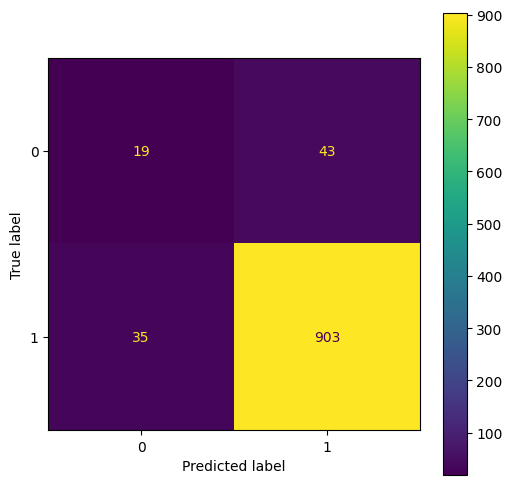

In [77]:
cmx=confusion_matrix(y_test,y_pred_svm)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

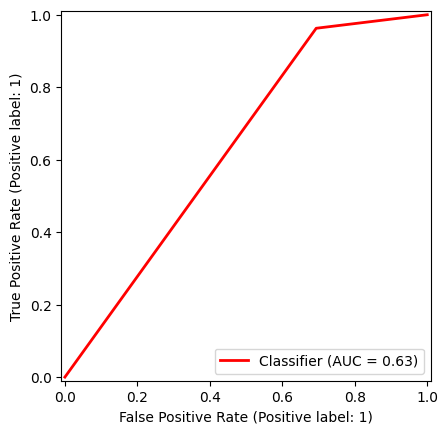

In [79]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_svm,drop_intermediate=False,lw=2,color='r')
plt.show()

In [75]:
print(f"f1_score:{f1_score(y_test,y_pred_svm)}")
print(f"precision score:{precision_score(y_test,y_pred_svm)}")
print(f"recall score:{recall_score(y_test,y_pred_svm)}")
print(f"accuracy:{accuracy_score(y_test,y_pred_svm)}")

f1_score:0.9585987261146497
precision score:0.9545454545454546
recall score:0.9626865671641791
accuracy:0.922


In [51]:
#test accuracy decision tree
import joblib
model_dt = joblib.load("decision_tree.pkl") 
y_pred_dt = model_dt.predict(X_test_scaled)

In [53]:
acc_dt=np.mean((y_pred_dt==y_test)*100)

In [55]:
acc_dt

79.4

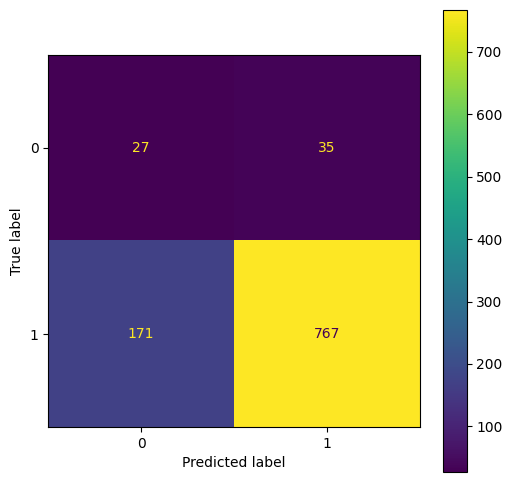

In [57]:
cmx=confusion_matrix(y_test,y_pred_dt)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

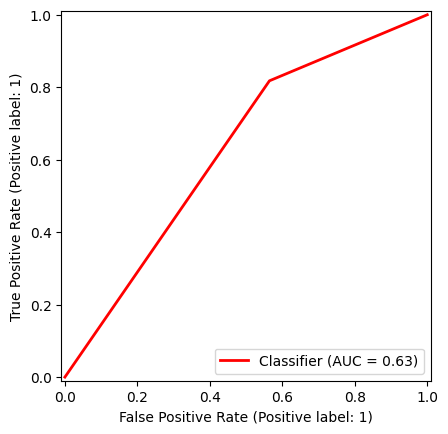

In [59]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_dt,drop_intermediate=False,lw=2,color='r')
plt.show()

In [81]:
print(f"f1_score:{f1_score(y_test,y_pred_dt)}")
print(f"precision score:{precision_score(y_test,y_pred_dt)}")
print(f"recall score:{recall_score(y_test,y_pred_dt)}")
print(f"accuracy:{accuracy_score(y_test,y_pred_dt)}")

f1_score:0.8816091954022989
precision score:0.956359102244389
recall score:0.8176972281449894
accuracy:0.794


In [63]:
#test accuracy adaboost
import joblib
model_addabost = joblib.load("adaboost_model.pkl") 
y_pred_adda = model_addabost.predict(X_test_scaled)

In [65]:
acc_ada=np.mean((y_pred_adda==y_test)*100)

In [67]:
acc_ada

79.4

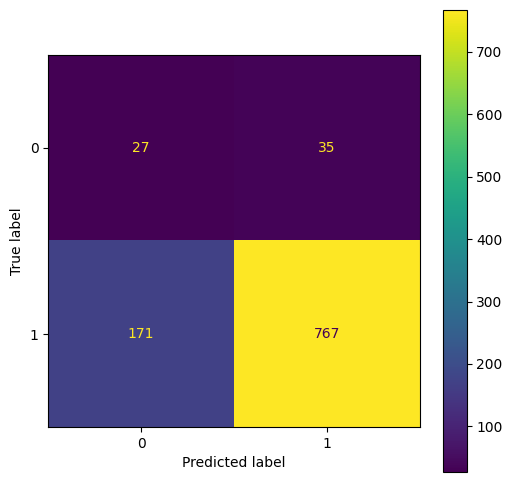

In [69]:
cmx=confusion_matrix(y_test,y_pred_adda)
cmx
disp=ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels=[0,1])
disp.plot(xticks_rotation=0)
fig=disp.ax_.get_figure()
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

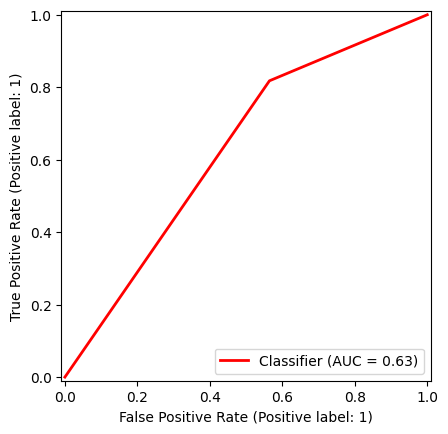

In [71]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_dt,drop_intermediate=False,lw=2,color='r')
plt.show()

In [83]:
print(f"f1_score:{f1_score(y_test,y_pred_adda)}")
print(f"precision score:{precision_score(y_test,y_pred_adda)}")
print(f"recall score:{recall_score(y_test,y_pred_adda)}")
print(f"accuracy:{accuracy_score(y_test,y_pred_adda)}")

f1_score:0.8816091954022989
precision score:0.956359102244389
recall score:0.8176972281449894
accuracy:0.794


In [ ]:
import matplotlib.pyplot as plt
x=['ann','log_reg','svm','des_tree','ada_bost']
y=[93.8,91.5,92.2,79.4,79]
plt.bar(x, y, color='green', edgecolor='black')
plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title("accuracy comprasion")
plt.show()